### Báo cáo: Tiền xử lý dữ liệu IWSLT 2015 (English - Vietnamese)

#### Phần 1: Khởi tạo và Xây dựng hàm xử lý

1.1. Import thư viện

In [1]:
import os
import re
import string
import unicodedata
import matplotlib.pyplot as plt

%matplotlib inline

1.2. Hàm thống kê và đọc dữ liệu

Hàm này chịu trách nhiệm đọc file, đếm số lượng câu, tính độ dài trung bình và trả về danh sách các câu để xử lý tiếp.

In [2]:
def analyze_dataset(file_path, label="Dữ liệu"):

    if not os.path.exists(file_path):
        print(f"ERROR: Không tìm thấy file tại {file_path}")
        return []

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    lines = [line.strip() for line in lines]
    
    num_sentences = len(lines)
    
    total_words = sum(len(line.split()) for line in lines)
    avg_len = total_words / num_sentences if num_sentences > 0 else 0
    
    print(f"--- Thống kê: {label} ---")
    print(f"File: {os.path.basename(file_path)}")
    print(f"Tổng số câu: {num_sentences}")
    print(f"Độ dài trung bình: {avg_len:.2f} từ/câu")
    print("-" * 30)
    
    return lines

1.3. Hàm tiền xử lý (Preprocessing)

Thực hiện các bước chuẩn hóa theo yêu cầu: Unicode NFC, Lowercase, Xử lý dấu câu, Loại bỏ câu rỗng.

In [3]:
def clean_text(lines):
    cleaned_lines = []
    # Regex loại bỏ dấu câu
    pattern = f"[{re.escape(string.punctuation)}]" 
    
    for line in lines:
        # 1. Bỏ dòng trống đầu vào
        line = line.strip()
        if not line: continue
        
        # 2.Loại bỏ các dòng metadata của IWSLT (bắt đầu bằng <)
        if line.startswith('<') and line.endswith('>'):
            continue
        if line.startswith('<url') or line.startswith('<talkid') or line.startswith('<keywords'):
            continue

        # 3. Chuẩn hóa Unicode & Lowercase
        line = unicodedata.normalize('NFC', line)
        line = line.lower()
        
        # 4. Xử lý dấu câu: Thay bằng khoảng trắng để tránh dính từ
        line = re.sub(pattern, ' ', line)
        line = re.sub(' +', ' ', line).strip()

        if line:
            cleaned_lines.append(line)
            
    return cleaned_lines

1.4. Hàm trực quan hóa (Biểu đồ)


Vẽ biểu đồ phân phối độ dài câu để có cái nhìn trực quan về dữ liệu.

In [4]:
def plot_sentence_length(lines, title="Phân bố độ dài câu"):
    lengths = [len(line.split()) for line in lines]
    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel('Số từ trong câu')
    plt.ylabel('Số lượng câu')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

#### Phần 2: Xử lý dữ liệu, các chỉ số dữ liệu và trực quan hóa

In [5]:
# Đường dẫn thư mục chứa data
data_dir = "IWSLT'15 en-vi" 
save_dir = "handled_data"

# Danh sách các file cần xử lý kèm nhãn (label) để in ra màn hình cho dễ theo dõi
files_to_process = [
    ("train.en.txt", "Train - Tiếng Anh"),
    ("train.vi.txt", "Train - Tiếng Việt"),
    
    ("tst2012.en.txt", "Test 2012 - Tiếng Anh"),
    ("tst2012.vi.txt", "Test 2012 - Tiếng Việt"),
    
    ("tst2013.en.txt", "Test 2013 - Tiếng Anh"),
    ("tst2013.vi.txt", "Test 2013 - Tiếng Việt")
]


==================== ĐANG XỬ LÝ: Train - Tiếng Anh ====================
--- Thống kê: Train - Tiếng Anh (RAW) ---
File: train.en.txt
Tổng số câu: 133317
Độ dài trung bình: 20.30 từ/câu
------------------------------
-> Đã lưu file sạch tại: train.en.clean.txt
--- Thống kê: Train - Tiếng Anh (CLEANED) ---
File: train.en.clean.txt
Tổng số câu: 133164
Độ dài trung bình: 18.48 từ/câu
------------------------------


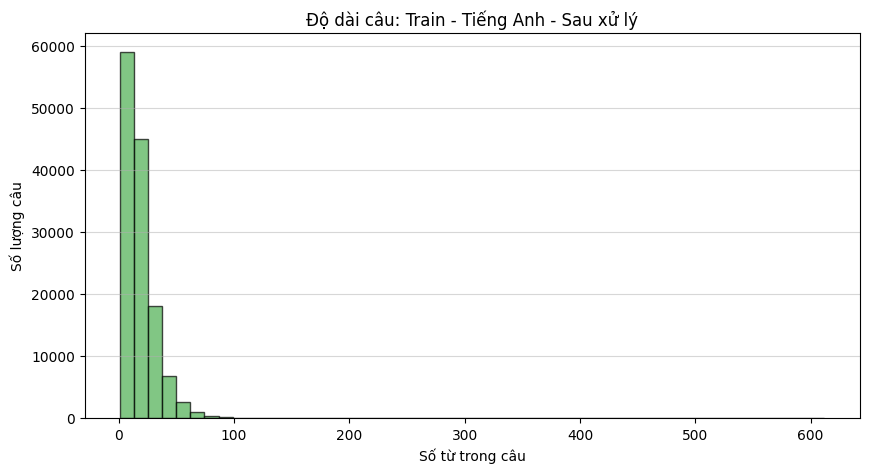




==================== ĐANG XỬ LÝ: Train - Tiếng Việt ====================
--- Thống kê: Train - Tiếng Việt (RAW) ---
File: train.vi.txt
Tổng số câu: 133317
Độ dài trung bình: 24.84 từ/câu
------------------------------
-> Đã lưu file sạch tại: train.vi.clean.txt
--- Thống kê: Train - Tiếng Việt (CLEANED) ---
File: train.vi.clean.txt
Tổng số câu: 133191
Độ dài trung bình: 22.79 từ/câu
------------------------------


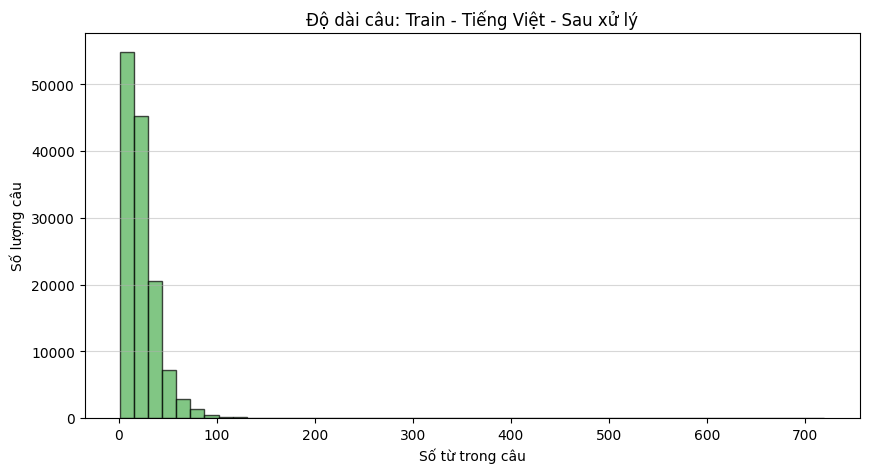




==================== ĐANG XỬ LÝ: Test 2012 - Tiếng Anh ====================
--- Thống kê: Test 2012 - Tiếng Anh (RAW) ---
File: tst2012.en.txt
Tổng số câu: 1553
Độ dài trung bình: 18.02 từ/câu
------------------------------
-> Đã lưu file sạch tại: tst2012.en.clean.txt
--- Thống kê: Test 2012 - Tiếng Anh (CLEANED) ---
File: tst2012.en.clean.txt
Tổng số câu: 1553
Độ dài trung bình: 16.55 từ/câu
------------------------------


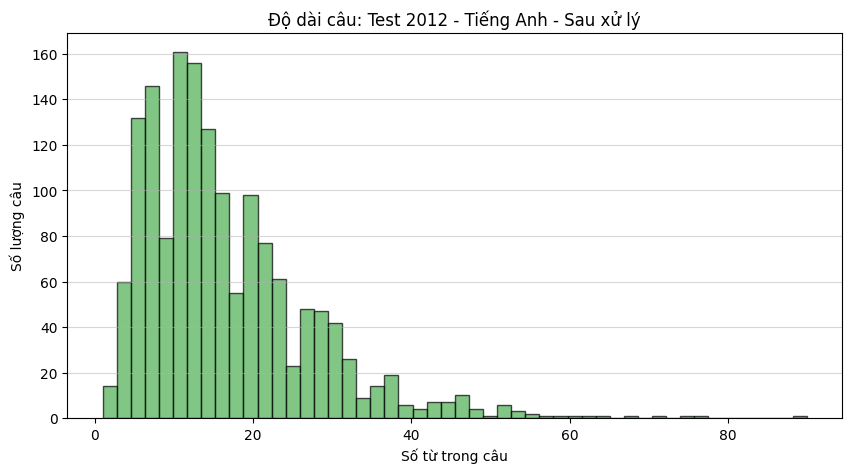




==================== ĐANG XỬ LÝ: Test 2012 - Tiếng Việt ====================
--- Thống kê: Test 2012 - Tiếng Việt (RAW) ---
File: tst2012.vi.txt
Tổng số câu: 1553
Độ dài trung bình: 22.08 từ/câu
------------------------------
-> Đã lưu file sạch tại: tst2012.vi.clean.txt
--- Thống kê: Test 2012 - Tiếng Việt (CLEANED) ---
File: tst2012.vi.clean.txt
Tổng số câu: 1553
Độ dài trung bình: 20.46 từ/câu
------------------------------


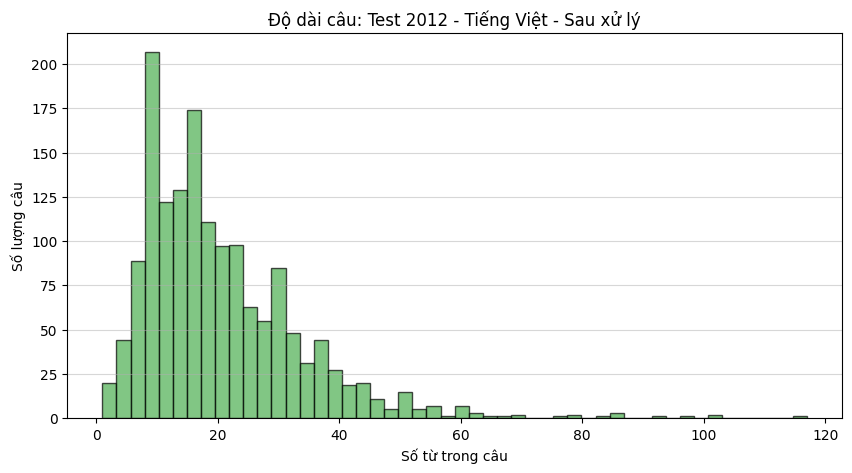




==================== ĐANG XỬ LÝ: Test 2013 - Tiếng Anh ====================
--- Thống kê: Test 2013 - Tiếng Anh (RAW) ---
File: tst2013.en.txt
Tổng số câu: 1268
Độ dài trung bình: 21.08 từ/câu
------------------------------
-> Đã lưu file sạch tại: tst2013.en.clean.txt
--- Thống kê: Test 2013 - Tiếng Anh (CLEANED) ---
File: tst2013.en.clean.txt
Tổng số câu: 1268
Độ dài trung bình: 19.06 từ/câu
------------------------------


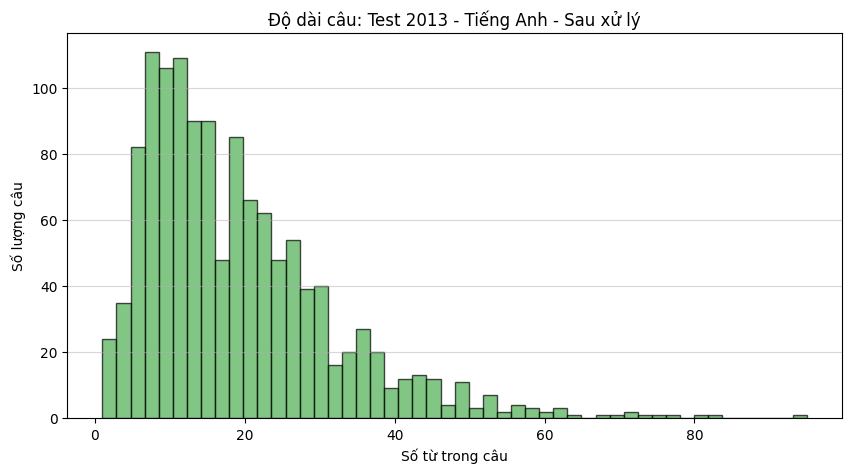




==================== ĐANG XỬ LÝ: Test 2013 - Tiếng Việt ====================
--- Thống kê: Test 2013 - Tiếng Việt (RAW) ---
File: tst2013.vi.txt
Tổng số câu: 1268
Độ dài trung bình: 26.56 từ/câu
------------------------------
-> Đã lưu file sạch tại: tst2013.vi.clean.txt
--- Thống kê: Test 2013 - Tiếng Việt (CLEANED) ---
File: tst2013.vi.clean.txt
Tổng số câu: 1268
Độ dài trung bình: 24.32 từ/câu
------------------------------


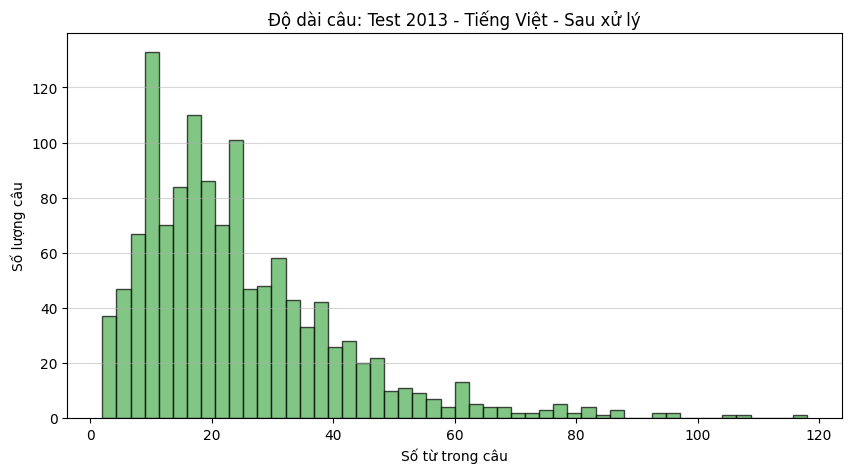

In [6]:
for filename, label in files_to_process:
    original_path = os.path.join(data_dir, filename)
    
    print(f"\n{'='*20} ĐANG XỬ LÝ: {label} {'='*20}")
    raw_lines = analyze_dataset(original_path, label=f"{label} (RAW)")
    
    if not raw_lines:
        continue

    cleaned_lines = clean_text(raw_lines)
    new_filename = filename.replace(".txt", ".clean.txt")
    save_path = os.path.join(save_dir, new_filename)
    
    try:
        with open(save_path, 'w', encoding='utf-8') as f:
            for line in cleaned_lines:
                f.write(line + '\n')
        print(f"-> Đã lưu file sạch tại: {new_filename}")
    except Exception as e:
        print(f"-> ERROR MEASSAGE: Không thể lưu file: {e}")
        continue
    
    analyze_dataset(save_path, label=f"{label} (CLEANED)")
    plot_sentence_length(cleaned_lines, title=f"Độ dài câu: {label} - Sau xử lý")
    
    print("\n") 

#### Phần 3: Xử lý file Từ vựng (Vocab) và Từ điển (Dictionary)

In [7]:
def process_dictionary_file(filepath):
    clean_entries = []
    if not os.path.exists(filepath):
        return []

    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    print(f"--- Xử lý Dictionary: {os.path.basename(filepath)} ---")
    print(f"Tổng số mục từ ban đầu: {len(lines)}")

    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 3:
            prob = parts[-1]
 
            w_en = unicodedata.normalize('NFC', parts[0]).lower()
            w_vi = unicodedata.normalize('NFC', parts[1]).lower()
            
            # Ghép lại
            new_line = f"{w_en} {w_vi} {prob}"
            clean_entries.append(new_line)
            
    return clean_entries

In [8]:
vocab_files = [
    ("vocab.en.txt", "Từ vựng Tiếng Anh"),
    ("vocab.vi.txt", "Từ vựng Tiếng Việt")
]

for filename, label in vocab_files:
    path = os.path.join(data_dir, filename)
    
    print(f"\n>>> ĐANG XỬ LÝ: {label}")
    raw_lines = analyze_dataset(path, label=f"{label} (GỐC)")
    
    if not raw_lines: continue
    cleaned_lines = clean_text(raw_lines)
    
    new_filename = filename.replace(".txt", ".clean.txt")
    save_path = os.path.join(save_dir, new_filename)
    
    with open(save_path, 'w', encoding='utf-8') as f:
        for line in cleaned_lines:
            f.write(line + '\n')
            
    print(f"-> Đã lưu file sạch (Vocab size: {len(cleaned_lines)}) tại: {new_filename}")


dict_filename = "dict.en-vi.txt"
dict_path = os.path.join(data_dir, dict_filename)

processed_dict = process_dictionary_file(dict_path)

if processed_dict:
    new_dict_filename = "dict.en-vi.clean.txt"
    save_dict_path = os.path.join(save_dir, new_dict_filename)
    
    with open(save_dict_path, 'w', encoding='utf-8') as f:
        for line in processed_dict:
            f.write(line + '\n')
            
    print(f"-> Đã lưu file từ điển sạch tại: {new_dict_filename}")
    print(f"-> Số lượng mục từ sau xử lý: {len(processed_dict)}")


>>> ĐANG XỬ LÝ: Từ vựng Tiếng Anh
--- Thống kê: Từ vựng Tiếng Anh (GỐC) ---
File: vocab.en.txt
Tổng số câu: 17191
Độ dài trung bình: 1.00 từ/câu
------------------------------
-> Đã lưu file sạch (Vocab size: 17171) tại: vocab.en.clean.txt

>>> ĐANG XỬ LÝ: Từ vựng Tiếng Việt
--- Thống kê: Từ vựng Tiếng Việt (GỐC) ---
File: vocab.vi.txt
Tổng số câu: 7709
Độ dài trung bình: 1.00 từ/câu
------------------------------
-> Đã lưu file sạch (Vocab size: 7681) tại: vocab.vi.clean.txt
--- Xử lý Dictionary: dict.en-vi.txt ---
Tổng số mục từ ban đầu: 22221
-> Đã lưu file từ điển sạch tại: dict.en-vi.clean.txt
-> Số lượng mục từ sau xử lý: 22218
